In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../datasets/transformed/data.csv', sep=';', on_bad_lines='skip', encoding='latin-1')

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,carga_horaria,fator_esforco_curso,regiao_Região Centro-Oeste,regiao_Região Nordeste,regiao_Região Norte,regiao_Região Sudeste,regiao_Região Sul,subeixo_tec_Informação e Comunicação,subeixo_tec_Informática,subeixo_tec_Telecomunicações,...,etnia_Preta,"renda_familiar_0,5<RFP<=1","renda_familiar_0,5<RFP<=1,0","renda_familiar_0<RFP<=0,5","renda_familiar_1,0<RFP<=1,5","renda_familiar_1,5<RFP<=2,5","renda_familiar_1<RFP<=1,5","renda_familiar_2,5<RFP<=3,5","renda_familiar_RFP>3,5",situacao
0,0.717857,-0.003348,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,Em curso
1,0.294643,-0.003387,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,Em curso
2,0.000000,-0.003375,False,False,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,Em curso
3,0.427500,-0.003348,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,Em curso
4,0.567857,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,Em curso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715233,0.591071,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,Evadidos
715234,0.591071,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,Evadidos
715235,0.639286,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,Evadidos
715236,0.639286,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,Evadidos


In [4]:
Xtr = df[df['situacao']!='Em curso']
Xtr.drop('situacao', axis=1, inplace=True)
Xtr

C:\Users\danie\AppData\Local\Temp\ipykernel_39048\1113588641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtr.drop('situacao', axis=1, inplace=True)


,carga_horaria,fator_esforco_curso,regiao_Região Centro-Oeste,regiao_Região Nordeste,regiao_Região Norte,regiao_Região Sudeste,regiao_Região Sul,subeixo_tec_Informação e Comunicação,subeixo_tec_Informática,subeixo_tec_Telecomunicações,...,etnia_Parda,etnia_Preta,"renda_familiar_0,5<RFP<=1","renda_familiar_0,5<RFP<=1,0","renda_familiar_0<RFP<=0,5","renda_familiar_1,0<RFP<=1,5","renda_familiar_1,5<RFP<=2,5","renda_familiar_1<RFP<=1,5","renda_familiar_2,5<RFP<=3,5","renda_familiar_RFP>3,5"
6,0.744286,-0.003359,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
16,0.657143,-0.003348,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
17,0.032143,-0.003393,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
28,0.592857,-0.003383,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
30,0.000000,-0.003393,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715233,0.591071,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
715234,0.591071,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
715235,0.639286,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
715236,0.639286,-0.003348,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
ytr = df['situacao'][df['situacao']!='Em curso']
ytr

6         Concluintes
16        Concluintes
17           Evadidos
28        Concluintes
30        Concluintes
             ...     
715233       Evadidos
715234       Evadidos
715235       Evadidos
715236       Evadidos
715237       Evadidos
Name: situacao, Length: 269581, dtype: object

In [6]:
ytr.unique()

array(['Concluintes', 'Evadidos'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(Xtr, ytr, test_size=0.25, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=9)
tree.fit(X_train, y_train)
predicted = tree.predict(X_val)
accuracy = accuracy_score(y_val, predicted)
print("Decision Tree Accuracy:", round(accuracy, 2))

Decision Tree Accuracy: 0.73


In [22]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_val, predicted))

Classification Report:
               precision    recall  f1-score   support

 Concluintes       0.71      0.71      0.71     31295
    Evadidos       0.75      0.75      0.75     36101

    accuracy                           0.73     67396
   macro avg       0.73      0.73      0.73     67396
weighted avg       0.73      0.73      0.73     67396



In [23]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, predicted))

Confusion Matrix:
 [[22067  9228]
 [ 9076 27025]]


In [26]:
tree.feature_importances_

array([2.43950217e-01, 2.24327846e-01, 3.10038765e-02, 1.93383387e-02,
       7.48785715e-03, 1.86358184e-02, 1.69538730e-02, 1.10155700e-02,
       4.15542571e-03, 0.00000000e+00, 2.40005828e-03, 9.87662754e-03,
       1.66477915e-03, 6.61638607e-04, 1.21749812e-02, 3.19444541e-02,
       8.14988422e-03, 2.13662769e-03, 1.52237504e-03, 6.64610205e-03,
       1.61049495e-03, 9.92427508e-03, 7.79843421e-03, 1.89876305e-03,
       2.89989734e-04, 3.82323642e-04, 1.18472512e-04, 1.09434982e-04,
       2.25348825e-04, 9.11918316e-05, 5.01133005e-04, 4.48890477e-03,
       5.92441837e-03, 0.00000000e+00, 0.00000000e+00, 1.63641815e-03,
       0.00000000e+00, 2.74792699e-01, 2.35083086e-05, 5.61416520e-05,
       7.78357336e-04, 1.19746203e-03, 4.63534898e-03, 0.00000000e+00,
       3.91504774e-05, 8.77902312e-04, 1.03423695e-04, 4.28194524e-03,
       3.49008871e-04, 1.75467434e-03, 1.05884276e-02, 7.15146657e-03,
       1.61953581e-03, 7.67367018e-04, 4.06752167e-04, 2.02571211e-04,
      

<Axes: >

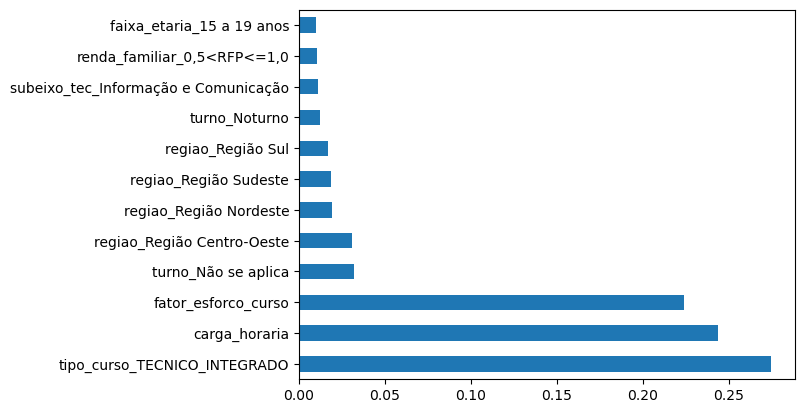

In [33]:
feat_importances = pd.Series(tree.feature_importances_, index=X_val.columns)
feat_importances.nlargest(12).plot(kind='barh')

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create decision tree   
model = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Show the best parameters
best_params

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [35]:
predicted = tree.predict(X_val)
accuracy = accuracy_score(y_val, predicted)
print("Decision Tree - Best Model - Accuracy:", round(accuracy, 2))

Decision Tree - Best Model - Accuracy: 0.73
